In [1]:
def read_book(title_path):
    """Read a book and return it as a string."""
    with open(title_path, "r", encoding="utf8") as current_file:
        text = current_file.read()
        text = text.replace("\n", "").replace("\r", "")
    return text

def count_words(text):
    """Count the number of times each word occurs in text (str). Return dictionary
    where keys are unique words and values are word counts. Skip punctuation."""
    text = text.lower()
    skips = [".", ",", ";", ":", "'", '"']
    for ch in skips:
        text = text.replace(ch, "")
    word_counts = {}
    for word in text.split(" "):
        if word in word_counts:
            word_counts[word] += 1
        else:
            word_counts[word] = 1
    return word_counts

def word_stats(word_counts):
    """Return number of unique words and word frequencies."""
    num_unique = len(word_counts)
    counts = word_counts.values()
    return (num_unique, counts)

import os
book_dir = "./Books"

import pandas as pd
stats = pd.DataFrame(columns = ("language", "author", "title", "length", "unique"))
title_num = 1

for language in os.listdir(book_dir):
    for author in os.listdir(book_dir + "/" + language):
        for title in os.listdir(book_dir + "/" + language + "/" + author):
            inputfile = book_dir + "/" + language + "/" + author + "/" + title
            print(inputfile)
            text = read_book(inputfile)
            (num_unique, counts) = word_stats(count_words(text))
            stats.loc[title_num] = language, author.capitalize(), title.replace(".txt", ""), sum(counts), num_unique
            title_num += 1
            

./Books/English/shakespeare/A Midsummer Night's Dream.txt
./Books/English/shakespeare/Hamlet.txt
./Books/English/shakespeare/Macbeth.txt
./Books/English/shakespeare/Othello.txt
./Books/English/shakespeare/Richard III.txt
./Books/English/shakespeare/Romeo and Juliet.txt
./Books/English/shakespeare/The Merchant of Venice.txt
./Books/French/chevalier/L'enfer et le paradis de l'autre monde.txt
./Books/French/chevalier/L'åle de sable.txt
./Books/French/chevalier/La capitaine.txt
./Books/French/chevalier/La fille des indiens rouges.txt
./Books/French/chevalier/La fille du pirate.txt
./Books/French/chevalier/Le chasseur noir.txt
./Books/French/chevalier/Les derniers Iroquois.txt
./Books/French/de Maupassant/Boule de Suif.txt
./Books/French/de Maupassant/Claire de Lune.txt
./Books/French/de Maupassant/Contes de la Becasse.txt
./Books/French/de Maupassant/L'inutile beautÇ.txt
./Books/French/de Maupassant/La Main Gauche.txt
./Books/French/de Maupassant/La Maison Tellier.txt
./Books/French/de Mau

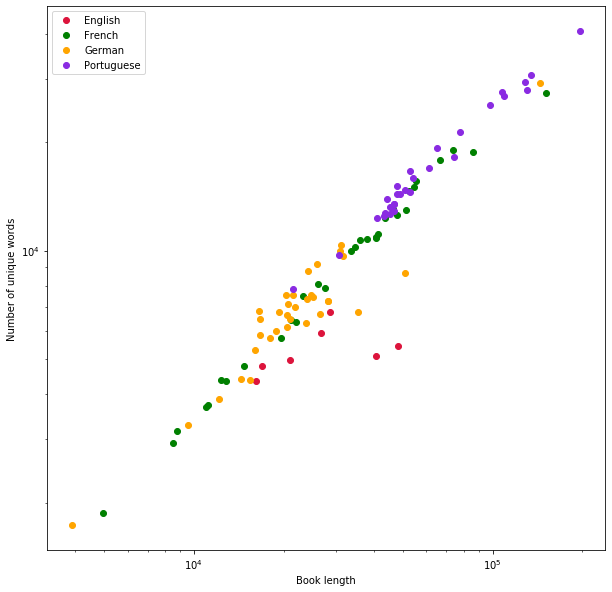

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 10))
subset = stats[stats.language == 'English']
plt.loglog(subset.length, subset.unique, "o", label = "English", color = "crimson")
subset = stats[stats.language == 'French']
plt.loglog(subset.length, subset.unique, "o", label = "French", color = "green")
subset = stats[stats.language == 'German']
plt.loglog(subset.length, subset.unique, "o", label = "German", color = "orange")
subset = stats[stats.language == 'Portuguese']
plt.loglog(subset.length, subset.unique, "o", label = "Portuguese", color = "blueviolet")
plt.legend()
plt.xlabel("Book length")
plt.ylabel("Number of unique words")
plt.savefig("lang_plot2.pdf")